In [1]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/home/melissa/PROJECT_DIRECTORIES/EEGFeatureExtraction/Scripts/Preprocessing/')
%run sleep_score_gmm.py
%run load_files.py

## Plotting colours 

### Load epochs over 3000mV and remove

In [2]:
clean_indices_dir = '/home/melissa/PREPROCESSING/SYNGAP1/cleaned_br_files/'

clean_indices_68 = pd.read_pickle(str(clean_indices_dir) + 'S7068_BL1.pkl')
clean_indices_70 = pd.read_pickle(str(clean_indices_dir) + 'S7070_BL1.pkl')
clean_indices_71 = pd.read_pickle(str(clean_indices_dir) + 'S7071_BL1.pkl')
clean_indices_74 = pd.read_pickle(str(clean_indices_dir) + 'S7074_BL1.pkl')
clean_indices_83 = pd.read_pickle(str(clean_indices_dir) + 'S7083_BL1.pkl')

packet_loss_68 = clean_indices_68.loc[clean_indices_68['brainstate'] == 6].index.to_list()
packet_loss_70 = clean_indices_70.loc[clean_indices_70['brainstate'] == 6].index.to_list()
packet_loss_71 = clean_indices_71.loc[clean_indices_71['brainstate'] == 6].index.to_list()
packet_loss_74 = clean_indices_74.loc[clean_indices_74['brainstate'] == 6].index.to_list()
packet_loss_83 = clean_indices_74.loc[clean_indices_74['brainstate'] == 6].index.to_list()


## 1. Load visually scored data and spectral slope indices

In [6]:
directory_path = '/home/melissa/PREPROCESSING/SYNGAP1/numpyformat_baseline/'

In [8]:
animal_list = ['S7068', 'S7070','S7071', 'S7074', 'S7083']
noise_slope_indices_df = []
clean_slope_indices_df = []
for animal in animal_list:
    print(animal)
    file_name_packet = str(animal) + '_BL1.pkl'
    packet_loss_indices = remove_typical_packet_loss(packet_loss_dir, file_name_packet)
    file_name = str(animal) + '_validation.xlsx'
    column_name = 'B'
    target_value = 1
    vis_scores, noise_indices = extract_visual_scores_packet_loss(path_to_data, file_name, column_name, target_value)

    directory_path = '/home/melissa/PREPROCESSING/SYNGAP1/numpyformat_baseline/'

    load_files = LoadFiles(directory_path, animal)
    data_1, brain_state_1 = load_files.load_one_analysis_file(start_times_dict = SYNGAP_baseline_start, end_times_dict = SYNGAP_baseline_end)
    noise_filter_1 = NoiseFilter(data_1, brain_state_file = brain_state_1, channelvariables = channel_variables,ch_type = 'all')
    bandpass_filtered_data_1 = noise_filter_1.filter_data_type()
    eeg_chan = bandpass_filtered_data_1[3]
    eeg_chan_split = np.split(eeg_chan, 17280, axis = 0)
    
    clean_epochs = []
    noise_epochs = []
    
    for idx, epoch in enumerate(vis_scores):
        freq, power_eeg = scipy.signal.welch(eeg_chan_split[idx], window='hann', fs=250.4, nperseg=1252)
        slope, intercept = np.polyfit(freq, power_eeg, 1)
        if epoch == 0:
            clean_epochs.append(slope)
        elif epoch == 1:
             noise_epochs.append(slope)
    

    noise_epochs_dict = {'Animal_ID': [str(animal)]*len(noise_epochs), 'Slope': noise_epochs}
    noise_epochs_df = pd.DataFrame(data = noise_epochs_dict)
    noise_slope_indices_df.append(noise_epochs_df)
    clean_epochs_dict = {'Animal_ID': [str(animal)]*len(clean_epochs), 'Slope': clean_epochs}
    clean_epochs_df = pd.DataFrame(data = clean_epochs_dict)
    clean_slope_indices_df.append(clean_epochs_df)

S7068
unique values
[0 1]
unique value counts
[14634  2646]
S7070
unique values
[0 1]
unique value counts
[14091  3189]
S7071
unique values
[0 1]
unique value counts
[14633  2647]
S7074
unique values
[0 1]
unique value counts
[12725  4555]
S7083
unique values
[0 1]
unique value counts
[14112  3168]


In [9]:
noise_concat = pd.concat(noise_slope_indices_df)
clean_concat = pd.concat(clean_slope_indices_df)

In [10]:
# Define a color map
noise_colors = {
    'S7068': 'red',
    'S7070': 'darkgreen',
    'S7071': 'darkblue',
    'S7074': 'purple',
    'S7083': 'orange'
}

clean_colors = {
    'S7068': 'pink',
    'S7070': 'lightgreen',
    'S7071': 'lightblue',
    'S7074': 'plum',
    'S7083': 'gold'
}


# Create a new column in the DataFrame to store colors
noise_plot = noise_concat['Animal_ID'].map(noise_colors)
clean_plot = clean_concat['Animal_ID'].map(clean_colors)

In [11]:
noise_concat['Color'] = noise_plot
clean_concat['Color'] = clean_plot

In [12]:
smaller_variation_clean = clean_concat.loc[clean_concat['Slope'] > -10]
smaller_variation_noisy = noise_concat.loc[noise_concat['Slope'] > -10] 
smaller_variation_noise = smaller_variation_noisy.loc[smaller_variation_noisy['Slope'] < 2]

In [51]:
anim_68 = smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7068']
print(anim_68.median())
anim_70= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7070']
print(anim_70.median())
anim_71= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7071']
print(anim_71.median())
anim_74= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7074']
print(anim_74.median())
anim_83= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7083']
print(anim_83.median())

Slope   -0.671254
dtype: float64
Slope   -0.118002
dtype: float64
Slope   -0.432212
dtype: float64
Slope   -0.081864
dtype: float64
Slope   -0.137494
dtype: float64


/tmp/ipykernel_544175/130423751.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_68.median())
/tmp/ipykernel_544175/130423751.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_70.median())
/tmp/ipykernel_544175/130423751.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.


In [50]:
anim_68 = smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7068']
print(anim_68.mean())
anim_70= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7070']
print(anim_70.mean())
anim_71= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7071']
print(anim_71.mean())
anim_74= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7074']
print(anim_74.mean())
anim_83= smaller_variation_noise.loc[smaller_variation_noise['Animal_ID'] == 'S7083']
print(anim_83.mean())

Slope   -1.655551
dtype: float64
Slope   -1.042575
dtype: float64
Slope   -1.802606
dtype: float64
Slope   -0.538377
dtype: float64
Slope   -1.267023
dtype: float64


/tmp/ipykernel_544175/618965442.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_68.mean())
/tmp/ipykernel_544175/618965442.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_70.mean())
/tmp/ipykernel_544175/618965442.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(an

In [52]:
anim_68 = noise_concat.loc[noise_concat['Animal_ID'] == 'S7068']
print(anim_68.median())
anim_70= noise_concat.loc[noise_concat['Animal_ID'] == 'S7070']
print(anim_70.median())
anim_71= noise_concat.loc[noise_concat['Animal_ID'] == 'S7071']
print(anim_71.median())
anim_74= noise_concat.loc[noise_concat['Animal_ID'] == 'S7074']
print(anim_74.median())
anim_83= noise_concat.loc[noise_concat['Animal_ID'] == 'S7083']
print(anim_83.median())

Slope   -285.281458
dtype: float64
Slope   -403.419837
dtype: float64
Slope   -1440.056409
dtype: float64
Slope   -175.754623
dtype: float64
Slope   -1741.680362
dtype: float64


/tmp/ipykernel_544175/2312889452.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_68.median())
/tmp/ipykernel_544175/2312889452.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_70.median())
/tmp/ipykernel_544175/2312889452.py:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warnin

In [53]:
anim_68 = noise_concat.loc[noise_concat['Animal_ID'] == 'S7068']
print(anim_68.mean())
anim_70= noise_concat.loc[noise_concat['Animal_ID'] == 'S7070']
print(anim_70.mean())
anim_71= noise_concat.loc[noise_concat['Animal_ID'] == 'S7071']
print(anim_71.mean())
anim_74= noise_concat.loc[noise_concat['Animal_ID'] == 'S7074']
print(anim_74.mean())
anim_83= noise_concat.loc[noise_concat['Animal_ID'] == 'S7083']
print(anim_83.mean())

Slope   -2911.183072
dtype: float64
Slope   -4063.283465
dtype: float64
Slope   -5424.081214
dtype: float64
Slope   -4897.468928
dtype: float64
Slope   -6071.797221
dtype: float64


/tmp/ipykernel_544175/3605615458.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_68.mean())
/tmp/ipykernel_544175/3605615458.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(anim_70.mean())
/tmp/ipykernel_544175/3605615458.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


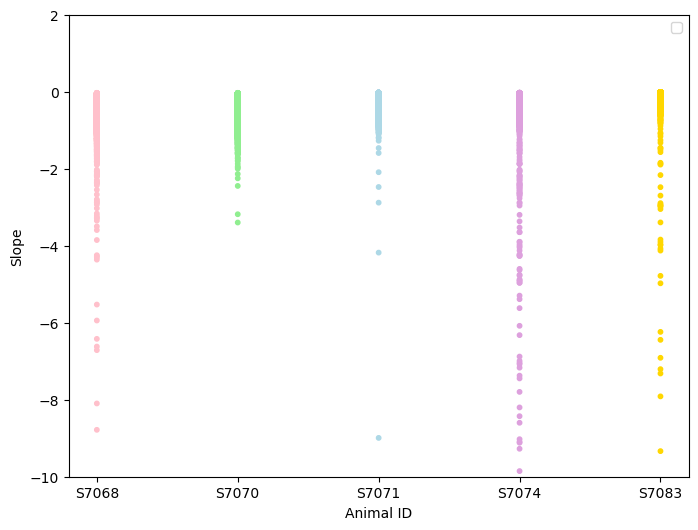

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(smaller_variation_clean['Animal_ID'], smaller_variation_clean['Slope'], c= smaller_variation_clean['Color'], s=10)

# Add labels and title
plt.xlabel('Animal ID')
plt.ylabel('Slope')
plt.ylim(-10,2)

# Show the legend
plt.legend()

plt.show()

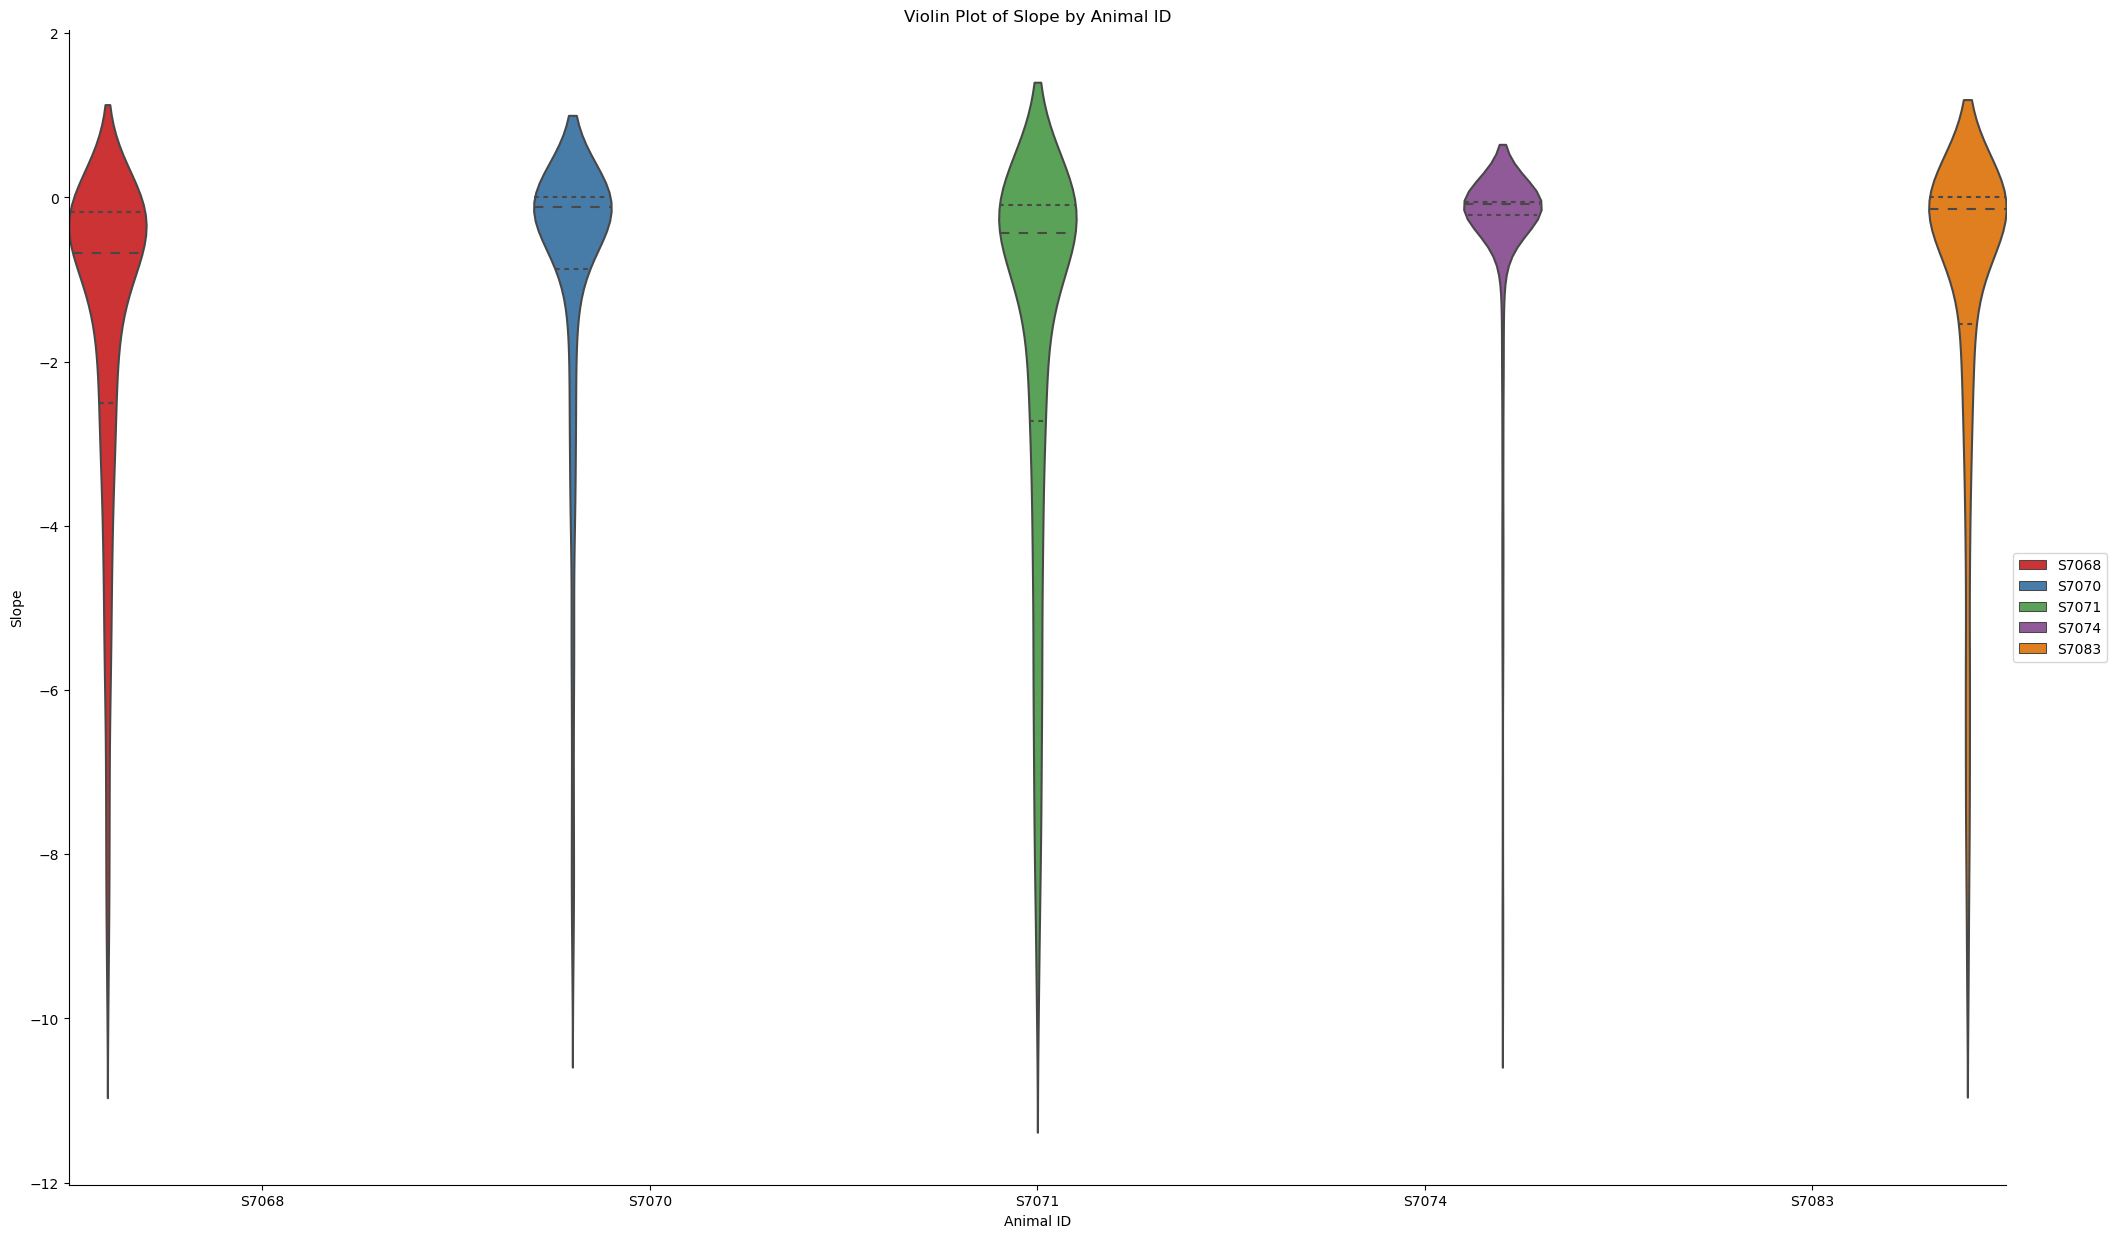

In [40]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Create a custom marker style
marker_style = {
    "marker": "o",
    "markerfacecolor": "white",
    "markeredgecolor": "black",
    "markersize": 5,
}

# Create the violin plot with custom inner points
sns.violinplot(data=smaller_variation_noise, x='Animal_ID',y='Slope',hue='Animal_ID',width=1,scale="width",
               palette='Set1',dodge=True, inner="quart",  # Use the custom marker style 
               density_norm={"count"})
sns.despine()
# Add labels and title
plt.xlabel('Animal ID')
plt.ylabel('Slope')
#plt.ylim(-10.5, 1)
plt.title('Violin Plot of Slope by Animal ID')

# Set the legend outside the plot for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the grid for better reference
plt.grid(False)


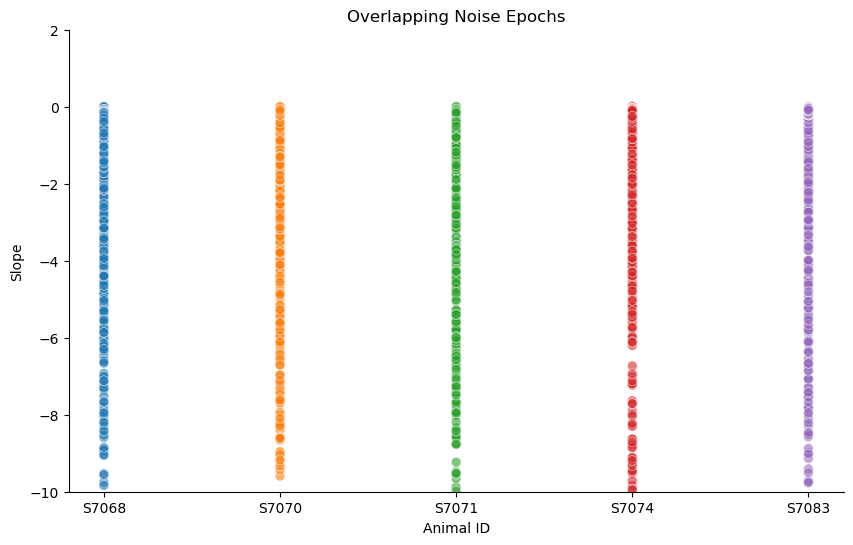

In [66]:

# Set the figure size

plt.figure(figsize=(10, 6))

# Create a scatter plot with Seaborn
#sns.scatterplot(data=noise_concat, x='Animal_ID', y='Slope', hue='Color', s=50, alpha=0.6, legend=False)
sns.scatterplot(data=smaller_variation_noisy, x='Animal_ID', y='Slope', hue='Color', s=50, alpha=0.6, legend=False)
sns.despine()

# Add labels and title
plt.xlabel('Animal ID')
plt.ylabel('Slope')
plt.title('Overlapping Noise Epochs')
plt.ylim(-10, 2)

# Set the legend outside the plot for better visibility
# Adjust the y-axis limits
#plt.ylim(-100, 2)

# Show the grid for better reference
plt.grid(False)



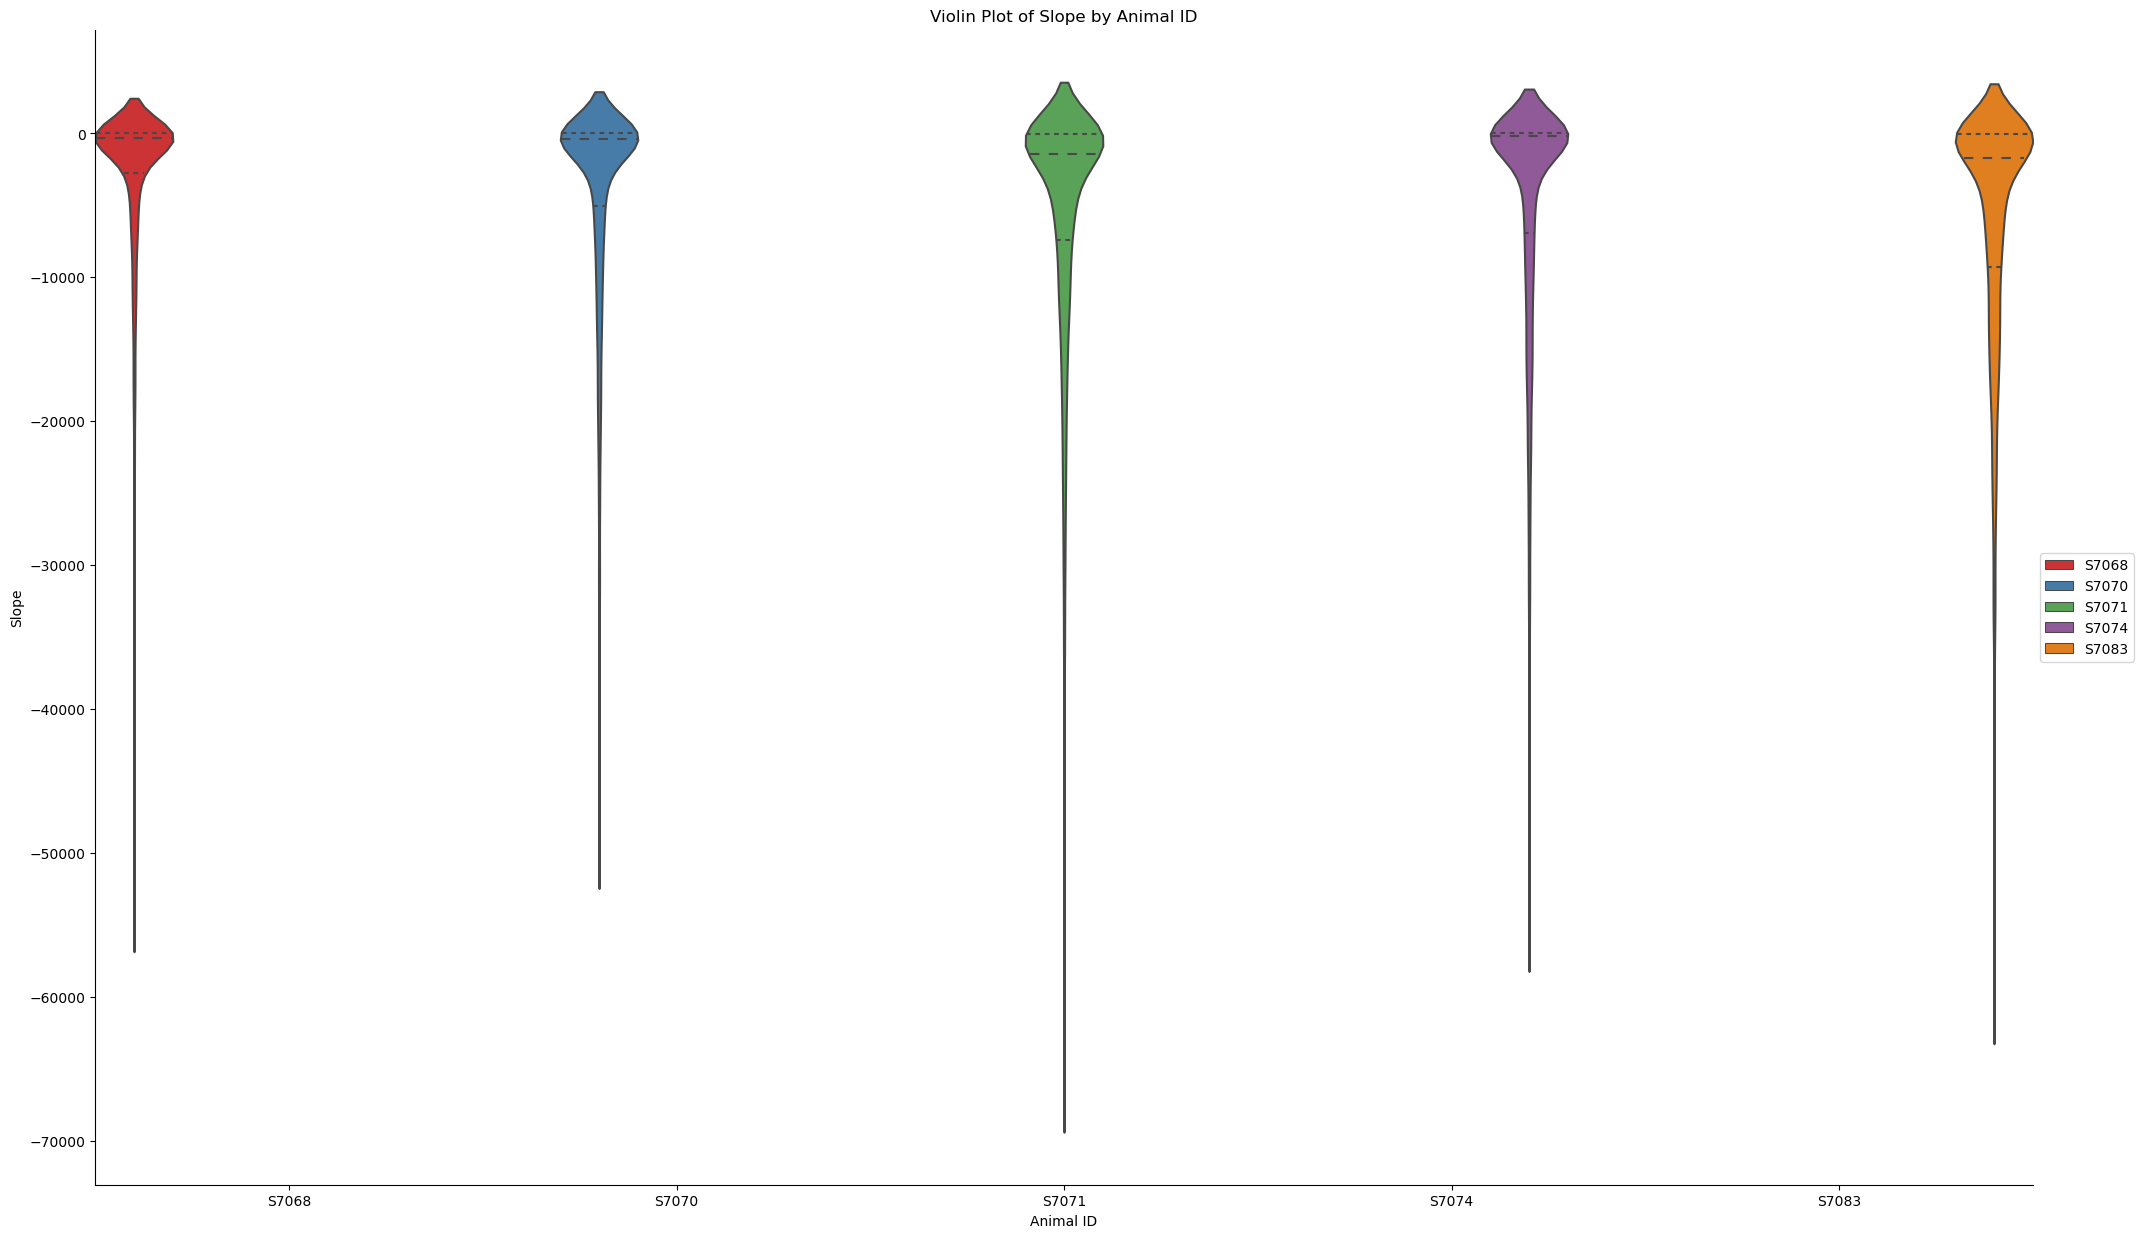

In [35]:
# Set the figure size
plt.figure(figsize=(25, 15))

# Create a custom marker style
marker_style = {
    "marker": "o",
    "markerfacecolor": "white",
    "markeredgecolor": "black",
    "markersize": 5,
}

# Create the violin plot with custom inner points
ax = sns.violinplot(data=noise_concat, x='Animal_ID',y='Slope',hue='Animal_ID',width=1,scale="width",
               palette='Set1',dodge=True, inner="quart",  # Use the custom marker style 
               density_norm={"count"})


sns.despine()
# Add labels and title
plt.xlabel('Animal ID')
plt.ylabel('Slope')
#plt.ylim(-10.5, 1)
plt.title('Violin Plot of Slope by Animal ID')

# Set the legend outside the plot for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the grid for better reference
plt.grid(False)


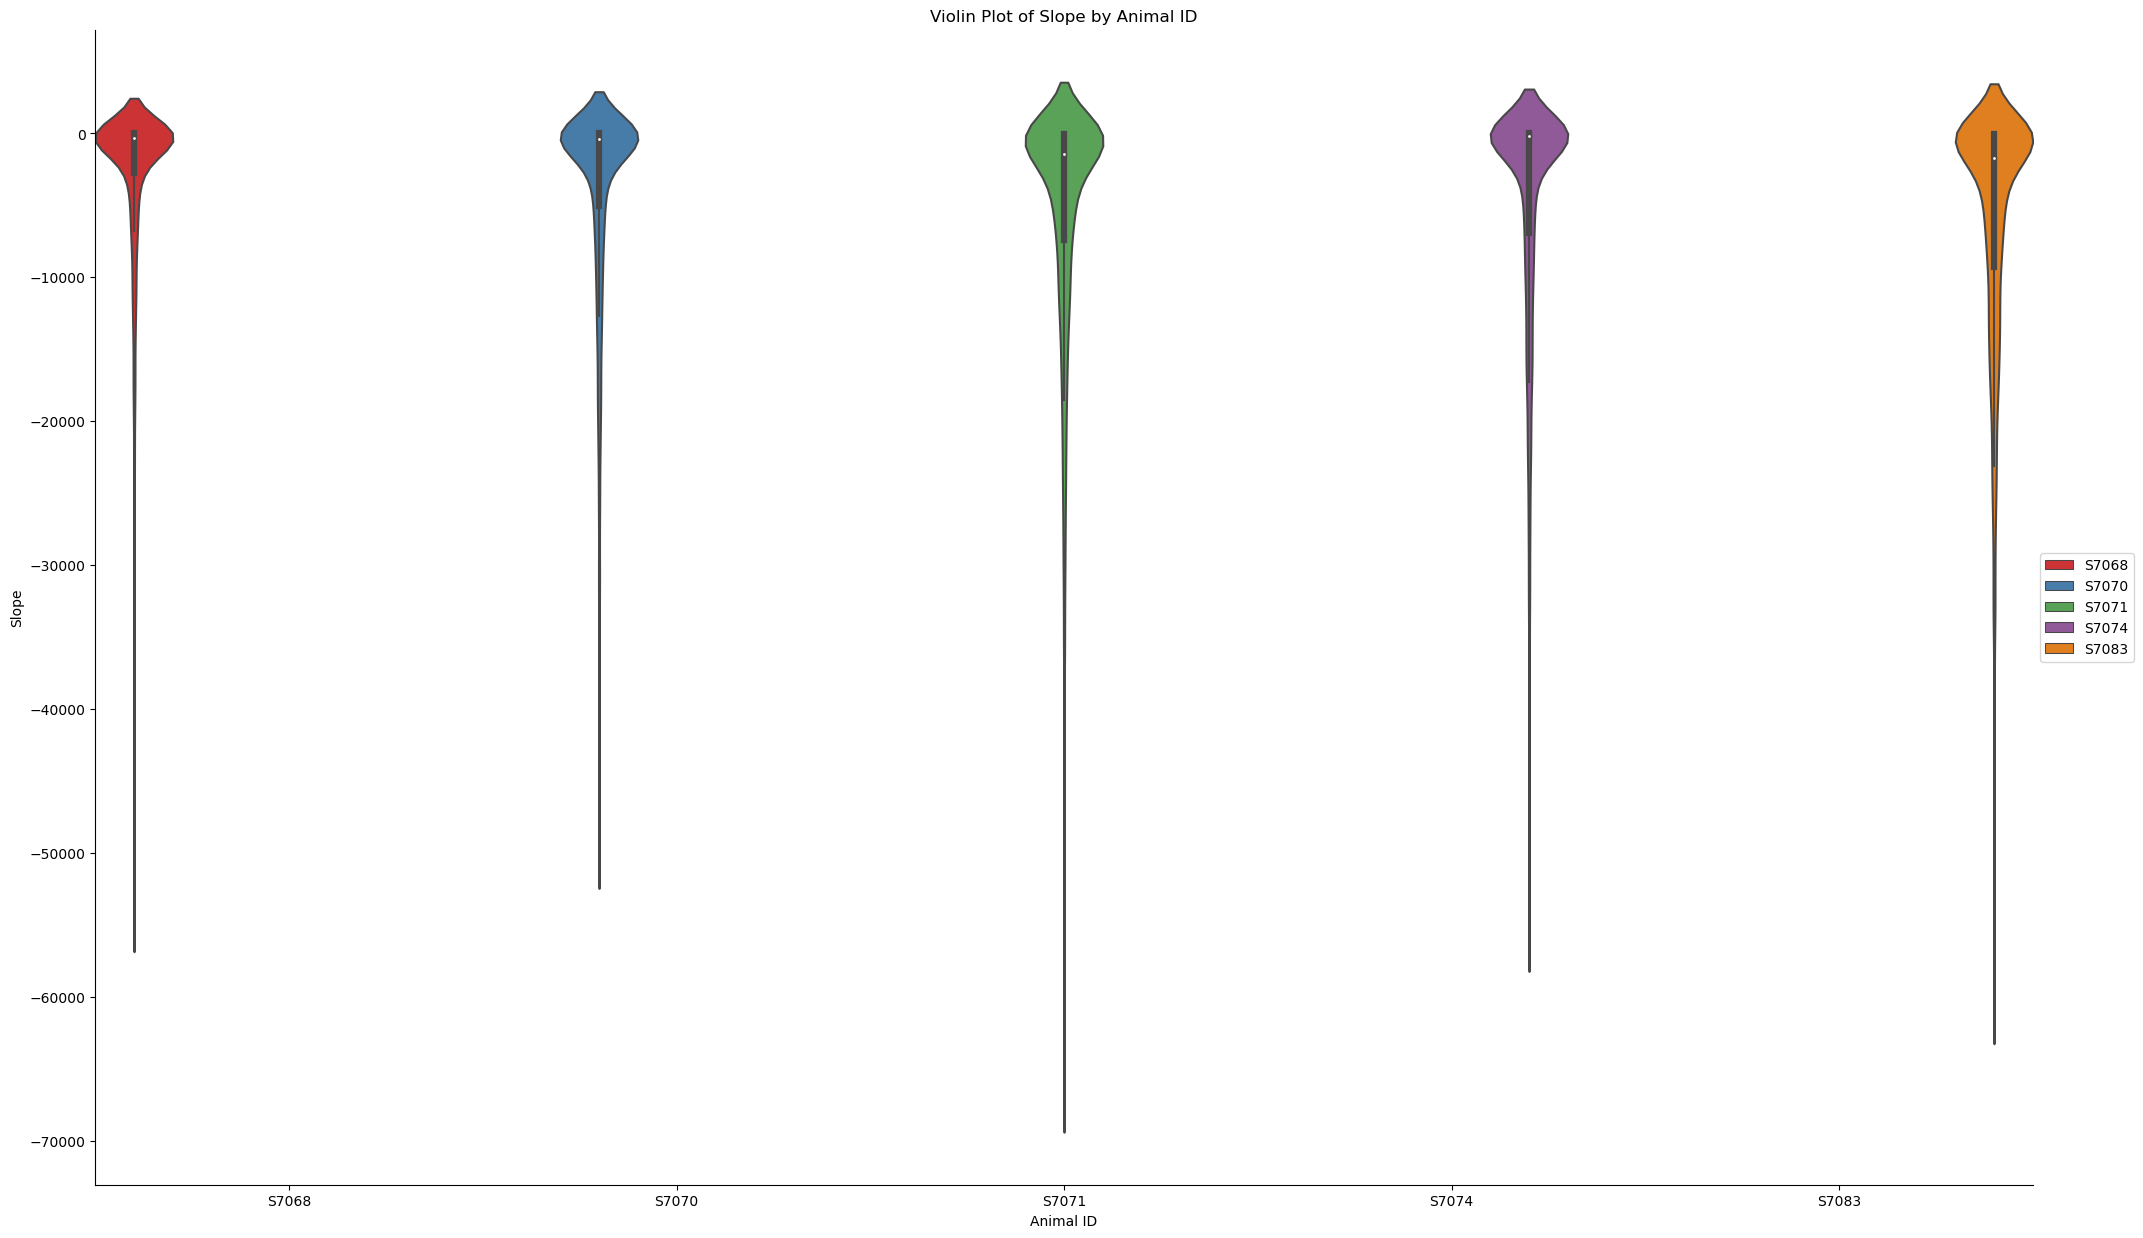

In [80]:

# Set the figure size
plt.figure(figsize=(25, 15))

# Create a violin plot with Seaborn
sns.violinplot(data=noise_concat, x='Animal_ID', y='Slope', hue='Animal_ID', palette = 'Set1',
               width = 1, dodge = True)
sns.despine()

# Add labels and title
plt.xlabel('Animal ID')
plt.ylabel('Slope')
#plt.ylim(-10, 2)
plt.title('Violin Plot of Slope by Animal ID')

# Set the legend outside the plot for better visibility
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the grid for better reference
plt.grid(False)
